In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

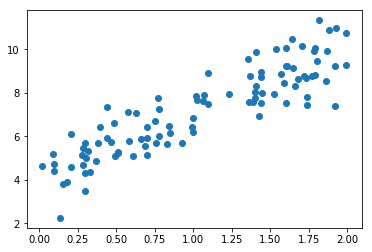

In [44]:
plt.plot(X,y,'o')

In [47]:
X_b = np.c_[np.ones((100,1)), X]

In [63]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.16754427]
 [2.9165207 ]]


In [61]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.16754427],
       [10.00058567]])

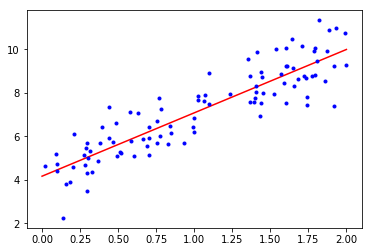

In [64]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.show()

In [67]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.16754427] [[2.9165207]]


array([[ 4.16754427],
       [10.00058567]])

## Batch Gradient Descent

In [92]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[4.16754427]
 [2.9165207 ]]


## Stochastic Gradient Descent

In [95]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2,1)
a=0
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[4.20841342]
 [2.92584061]]


In [102]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12314536]), array([2.93106532]))